機械学習特論 第5回 分類 svm アヤメのデータの分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
# from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
iris_data = load_iris()

# 学習用データのデータフレームを作成 (targetが1か2のデータである先頭100件を抽出)
x = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])[50:150]
y = pd.DataFrame(iris_data["target"],columns=["target"])[50:150] # species 1 2 を抽出

# データフレームの情報を表示
print('feature shape:', x.shape) # 説明変数の形状
print('feature names:', iris_data["feature_names"]) # 説明変数の列名
print('target shape:', y.shape, y['target'].unique()) # 正解ラベルの形状とクラス名一覧

feature shape: (100, 4)
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target shape: (100, 1) [1 2]


75 25 75 25


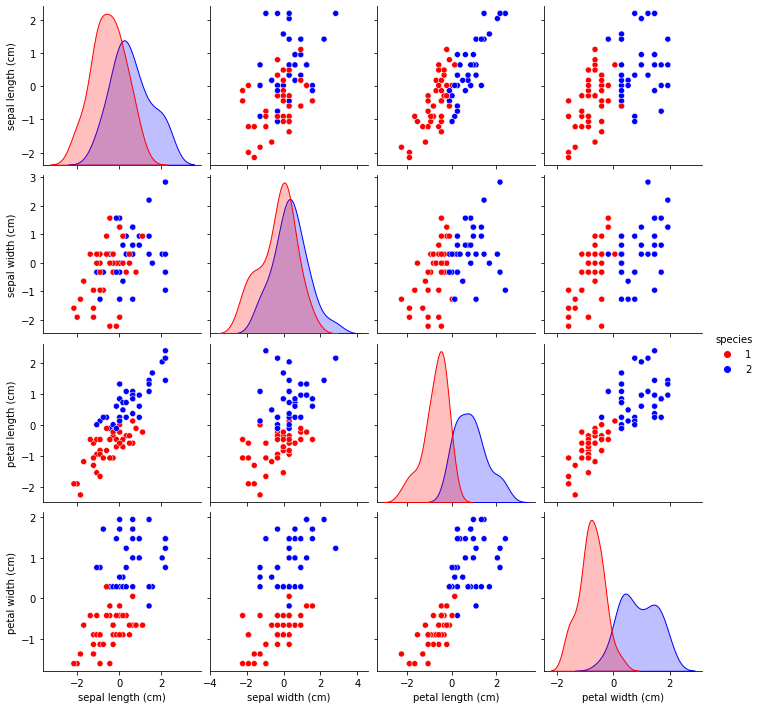

In [3]:
# データを学習用と検証用に分割
_x_train, _x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(len(_x_train), len(_x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

# データを標準化
scaler = StandardScaler()
scaler.fit(_x_train)
x_train = scaler.transform(_x_train)
x_test = scaler.transform(_x_test)

# ペアプロットを表示
_plot = pd.DataFrame(x_train, 
                     columns=['sepal length (cm)', 
                              'sepal width (cm)', 
                              'petal length (cm)', 
                              'petal width (cm)'],
                     index=_x_train.index)
_plot['species'] = y_train['target']  # コピーした学習データに正解ラベルの列を追加
sns.pairplot(_plot, hue='species', # 品種(species)で色分け
                    palette={1: 'red', 2: 'blue'},   # 各クラスの色を指定
                    height=2.5)  # ペアプロットの各グラフの高さを指定 (全体ではない)
plt.show()

In [4]:
from sklearn import svm

# svm (kernel="linear", C=1.0) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="linear", C=1.0, max_iter=1000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="linear", C=1.0, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="linear", C=1.0, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="linear", C=1.0, train data) : accuracy_score 0.96
svm (kernel="linear", C=1.0, test data) : accuracy_score 0.92


In [5]:
# svm (kernel="rbf", C=1.0) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="rbf", C=1.0, max_iter=1000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="rbf", C=1.0, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="rbf", C=1.0, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="rbf", C=1.0, train data) : accuracy_score 0.96
svm (kernel="rbf", C=1.0, test data) : accuracy_score 0.88
